
# Project: NO-SHOW APPOINTEMENTS DATA ANALYSIS - [NO-SHOW APPOINTEMENTS]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. it contains a single table and 14 variables which are:
<ol>
<li> <b>PatientId:</b>Identification of a patient</li>
<li> <b>AppointmentID: </b>Identification of each appointment</li> 
<li> <b>Gender: </b>Male or Female.</li> 
<li> <b> DataMarcacaoConsulta: </b>The day of the actuall appointment, when they have to visit the doctor.</li> 
<li>  <b> DataAgendamento: </b>The day someone called or registered the appointment, this is before appointment of course.</li> 
<li>  <b>Age:</b>How old is the patient</li> 
<li>  <b>Neighbourhood: </b>Where the appointment takes place.</li> 
<li>  <b>Scholarship: </b> does the patient benefit from the Brazilian welfare program which allows me to receive financial assistance (True or False)</li> 
<li>  <b>Hipertension: </b>patient with hypertension?(True or False)</li>
<li>  <b>Diabetes: </b>diabetic patient?(True or False)</li>
<li>  <b>Alcoholism:</b>alcoholic patient?(True or False)</li>
<li>  <b>Handcap: </b>does the patient have a disability(True or False)</li>
<li>  <b>SMS_received: </b>does the patient receive an appointment reminder message(True or False)</li>
<li>  <b>No-show: </b>the patient came to the appointment?(True or False)</li>  
</ol>


### Question(s) for Analysis
<ol>
<li>Which gender honors these appointments more?</li>
<li>What is the age category that honors these appointments less and what is the age category that honors them more?</li> 
<li>The waiting time of the day of the appointment plays what role in a patient for the respect or not of the appointment?</li>
 <li>Does receiving a reminder sms influence a patient to keep his appointment?</li>
<li>Does alcoholism play a role in not respecting the appointment?</li>
<li> Does the handicap play a role in not respecting the appointment?</li>
 </ol>

In [1]:
# import statements for all of the packages that we
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as ns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load ours data and print out a few lines. Perform operations to inspect data.
df_Ns=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_Ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check data type.we notice that ScheduledDay  and AppointmentDay  are of type string we will have to change their type for the type date 
df_Ns.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#we check if there is no empty value.we can notice that not row of empty value.
df_Ns.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# we check if there are duplicated row.
df_Ns.duplicated().sum()

0

In [7]:
# we check the a brief description of data . we can fine that colomn Age have a negative value(-1) that we will drop because Age of personne can be negative
df_Ns.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#we check if the unique value of each colomn is correct. variable Handicap have 5 value 
df_Ns.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# we check of unique values of Handcap. we find that the uniques values of colomn Handcap are [0, 1, 2, 3, 4] these value meaning the number of Handcap of pasient we must transforms this value to 0(pasient don't have handcap)  and 1 (pasient have handcap) in the following
df_Ns['Handcap'].unique()

array([0, 1, 2, 3, 4])


### Data Cleaning 

 during Data Wrangling step we find that Handcap have  unique value what is not correct we are going to change it by replace all value >= 1 to 1  

In [10]:
df_Ns['Handcap'].replace([2, 3, 4], 1, inplace=True)
df_Ns.Handcap.unique()

array([0, 1])

We are changing the type of AppointmentID and ScheduledDay of string to date

In [11]:
df_Ns['AppointmentDay']= pd.to_datetime(df_Ns['AppointmentDay'])

df_Ns['AppointmentDay']= df_Ns['AppointmentDay'].dt.date

df_Ns['ScheduledDay']= pd.to_datetime(df_Ns['ScheduledDay'])

df_Ns['ScheduledDay']= df_Ns['ScheduledDay'].dt.date
df_Ns.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Age with one negative value we drop it


In [12]:
# we count pasient with incorrect Age value
df_Ns.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [13]:
#we drop pasient with incorrect age value
df_Ns.drop(df_Ns.query('Age=="-1"').index, inplace=True)

we search if have incoherence between AppointmentDay  and ScheduledDay those witch verify AppointmentDay<ScheduledDay

In [14]:
#geting the list of pasient witch verify AppointmentDay<ScheduledDay
incoh_appointment=df_Ns.query('AppointmentDay<ScheduledDay')
incoh_appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [15]:
# we drop pasient with incoherence 
df_Ns.drop(incoh_appointment.index, inplace=True)

we rename No-show to No_show

In [16]:
df_Ns.rename(columns={"No-show": "No_show"}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which gender honors these appointments more?

To answer our first question we will follow the following steps: 


In [17]:
#a function wicht get a sublist in a list
def get_sublist(DataFrame, condition):
    sub_list=DataFrame.query(condition)
    return sub_list

a) we get the  persons who show up

In [18]:
Total_showup=get_sublist(df_Ns,'No_show=="No"')


b) we get the number of male and female in pasient 

In [19]:
F_df=df_Ns.query('Gender=="F"').shape[0]
M_df=df_Ns.query('Gender=="M"').shape[0]
M_df,F_df

(38685, 71836)

We notice that there are more female than male in patient

c) we get Female and male who show up

In [20]:
F_showup=Total_showup.query('Gender=="F"').shape[0]
M_showup=Total_showup.query('Gender=="M"').shape[0]
M_showup,F_showup

(30962, 57245)

d) we calculate the percentage of men who go or not to the appointment as well as women

In [21]:
Perc_M_showup=M_showup/M_df*100
Perc_F_showup=F_showup/F_df*100
#Test
Perc_M_showup,Perc_F_showup

(80.0361897376244, 79.68845704103792)

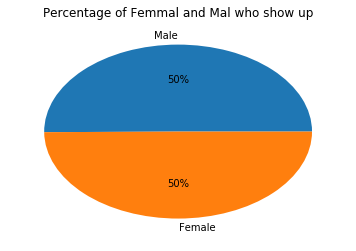

In [22]:
heights=[Perc_M_showup,Perc_F_showup]
mylabels=["Male","Female"]
plt.pie(heights, labels=mylabels,  autopct='%1.0f%%')
plt.title("Percentage of Femmal and Mal who show up");
plt.show()

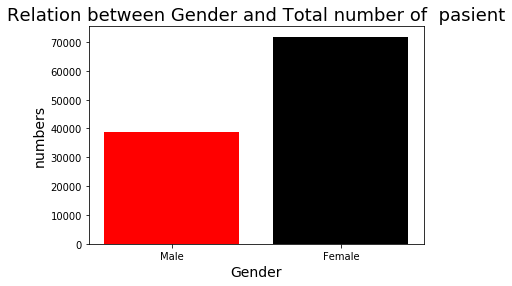

In [23]:
locations = [1, 2]
labels = ['Male', 'Female']
heights = [M_df, F_df]
plt.bar(locations, heights, tick_label=labels, color=['red', 'black'])
plt.title("Relation between Gender and Total number of  pasient", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("numbers", fontsize=14);

We note that despite the large number of women among the patients (practice twice the number of men) there is a small difference between the percentage of men who honor their appointment and that of women. Gender is not an indicator of whether a pasient will keep their appointment or not.

### Research Question 2 : What is the age category that honors these appointments less and what is the age category that honors them more?

To answer  this question we follow these steps:


a) we divise the pasient age between 04 categories:Children(0 to 14 year),teenagers(15 to 24 year),Adults(25 to 64 year),Elders(65 to ...)
 

In [24]:
#child=df_Ns.query('Age>=0 & Age<=14')
child=get_sublist(df_Ns,'Age>=0 & Age<=14')
teen=get_sublist(df_Ns,'Age>=15 & Age<=24')
adult=get_sublist(df_Ns,'Age>=25 & Age<=64')
elder=get_sublist(df_Ns,'Age>=65')
#Test 

child.shape[0]+teen.shape[0]+adult.shape[0]+elder.shape[0]==df_Ns.shape[0]

True

b)for each categories we get the number of pasient who show up

In [25]:
child_showup=get_sublist(child,'No_show=="No"')
teen_showup=get_sublist(teen,'No_show=="No"')
adult_showup=get_sublist(adult,'No_show=="No"')
elder_showup=get_sublist(elder,'No_show=="No"')


c)Now we can compute the percentage of each category who show up

In [26]:
perc_child_showup=len(child_showup)/len(child)*100
perc_teen_showup=len(teen_showup)/len(teen)*100
perc_adult_showup=len(adult_showup)/len(adult)*100
perc_elder_showup=len(elder_showup)/len(elder)*100
perc_child_showup,perc_teen_showup,perc_adult_showup,perc_elder_showup

(78.82266941864465, 74.74300399771559, 80.25859725431562, 84.50107631414485)

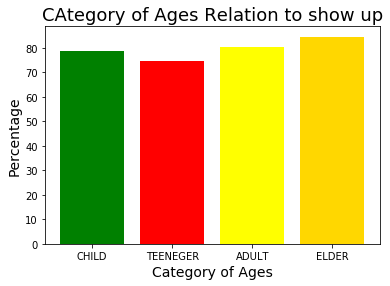

In [27]:
locations = [1, 2, 3, 4]
labels = ['CHILD', 'TEENEGER','ADULT','ELDER']
heights = [perc_child_showup,perc_teen_showup,perc_adult_showup,perc_elder_showup]
plt.bar(locations, heights, tick_label=labels, color=['green', 'red','yellow','gold'])
plt.title("CAtegory of Ages Relation to show up", fontsize=18)
plt.xlabel("Category of Ages", fontsize=14)
plt.ylabel("Percentage", fontsize=14);

We find that the elders are the ones who respect the appointment more while the teenagers are the ones who respect it less

### Research Question 3:  The waiting time of the day of the appointment plays what role in a patient for the respect or not of the appointment?

The answer of this question will be through following steps: 

a) we add a new colomn(waiting) in ours dataset 

In [28]:
df_Ns["waiting"] = (df_Ns["AppointmentDay"] - df_Ns["ScheduledDay"] ).dt.days.astype(int)

b) Now we devise waiting in 03 category:
low_waiting[min_waiting , mean_waiting[
medium_waiting [mean_waiting , quantile(0.75)[
high_waiting [quantile(0.75, max_waiting)

In [29]:
low_waiting= get_sublist(df_Ns,'waiting>=0 & waiting<4')
medium_waiting= get_sublist(df_Ns,'waiting>=4 & waiting<15')
high_waiting= get_sublist(df_Ns,'waiting>=15')
##verification 
len(low_waiting)+len(medium_waiting)+len(high_waiting)==len(df_Ns)

True

c) in each category of waiting we get the show up pasient

In [30]:
low_waiting_showup=get_sublist(low_waiting,'No_show=="No"')
medium_waiting_showup=get_sublist(medium_waiting,'No_show=="No"')
high_waiting_showup=get_sublist(high_waiting,'No_show=="No"')


d) we get the percentage of each category

In [31]:
perc_low_waiting_showup=low_waiting_showup.shape[0]/len(low_waiting)*100
perc_medium_waiting_showup=medium_waiting_showup.shape[0]/len(medium_waiting)*100
perc_high_waiting_showup=high_waiting_showup.shape[0]/len(high_waiting)*100


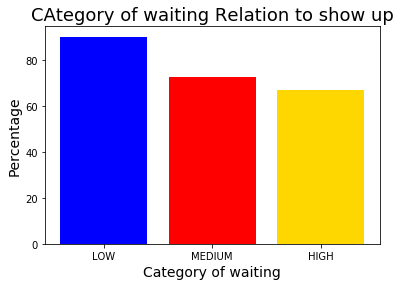

In [32]:
locations = [1, 2, 3]
labels = ['LOW', 'MEDIUM','HIGH']
heights = [perc_low_waiting_showup,perc_medium_waiting_showup,perc_high_waiting_showup]
plt.bar(locations, heights, tick_label=labels, color=['blue', 'red','gold'])
plt.title("CAtegory of waiting Relation to show up", fontsize=18)
plt.xlabel("Category of waiting", fontsize=14)
plt.ylabel("Percentage", fontsize=14);

we can notice that less is the waiting time for the appointements more pasients show up

### Research Question 4:  Does receiving a reminder sms influence a patient to keep his appointment?

a) first of all we get the pasients who received reminder sms and show up(Rm_sms_showup) , we get also the pasients who not received sms and  show up(NRm_sms_showup) and we compute the percentage of each category


In [33]:
Rm_sms_showup=get_sublist(df_Ns,'No_show=="No" & SMS_received==1')
NRm_sms_showup=get_sublist(df_Ns,'No_show=="No" & SMS_received==0')
Total_showup=get_sublist(df_Ns,'No_show=="No"')
Perc_Rm_sms_showup=len(Rm_sms_showup)/len(Total_showup)*100
Perc_NRm_sms_showup=len(NRm_sms_showup)/len(Total_showup)*100
Perc_Rm_sms_showup,Perc_NRm_sms_showup

(29.133742220005214, 70.8662577799948)

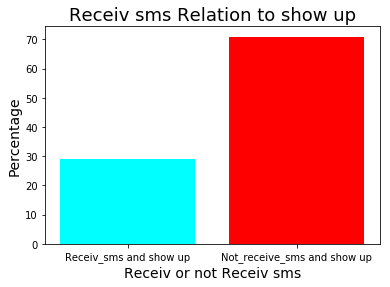

In [34]:
locations = [1, 2, ]
labels = ['Receiv_sms and show up', 'Not_receive_sms and show up']
heights = [Perc_Rm_sms_showup,Perc_NRm_sms_showup]
plt.bar(locations, heights, tick_label=labels, color=['cyan', 'red'])
plt.title("Receiv sms Relation to show up", fontsize=18)
plt.xlabel("Receiv or not Receiv sms", fontsize=14)
plt.ylabel("Percentage", fontsize=14);

we obtain an unexpected result among the people who came to the appointment the percentage of those who received the sms is very low (29%) compared to the percentage of those who did not receive the sms (71%) we therefore conclude that 'there is no correlation between the reminder sms and going to the appointment

### Research Question 5: Does alcoholism play a role in not respecting the appointment

a) we get the percentage of alcoholism pasient who show up and not show up

In [35]:
# we get list of alcoholism pasient
alco=get_sublist(df_Ns,'Alcoholism==1')
#get the list of alcoholism pasient who show up and no show
alco_showup=get_sublist(alco,'No_show=="No"')
alco_noshow=get_sublist(alco,'No_show=="Yes"')

b) we get the percentage of each


In [36]:
perc_alco_showup=len(alco_showup)/len(alco)*100
perc_alco_noshow=len(alco_noshow)/len(alco)*100
perc_alco_showup,perc_alco_noshow

(79.85119047619048, 20.148809523809526)

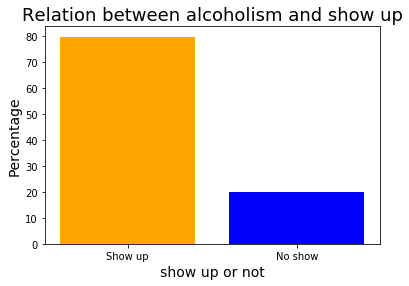

In [37]:
locations = [1, 2, ]
labels = ['Show up', 'No show']
heights = [perc_alco_showup,perc_alco_noshow]
plt.bar(locations, heights, tick_label=labels, color=['orange', 'blue'])
plt.title("Relation between alcoholism and show up", fontsize=18)
plt.xlabel("show up or not", fontsize=14)
plt.ylabel("Percentage", fontsize=14);

In [38]:
# we get list of not alcoholism pasient
noalco=get_sublist(df_Ns,'Alcoholism==0')
#get the list of not alcoholism pasient who show up and no show
noalco_showup=get_sublist(noalco,'No_show=="No"')
noalco_noshow=get_sublist(noalco,'No_show=="Yes"')

In [39]:
#percentage of thoses who are not alcoholism and show up or not their appointement 
perc_noalco_showup=len(noalco_showup)/len(noalco)*100
perc_noalco_noshow=len(noalco_noshow)/len(noalco)*100
perc_noalco_showup,perc_noalco_noshow

(79.80888569535558, 20.191114304644415)

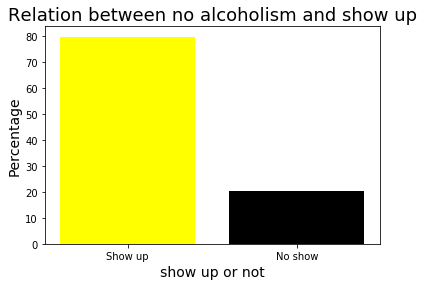

In [40]:
locations = [1, 2,]
labels = ['Show up', 'No show']
heights = [perc_noalco_showup,perc_noalco_noshow]
plt.bar(locations, heights, tick_label=labels, color=['yellow', 'black'])
plt.title("Relation between no alcoholism and show up", fontsize=18)
plt.xlabel("show up or not", fontsize=14)
plt.ylabel("Percentage", fontsize=14);

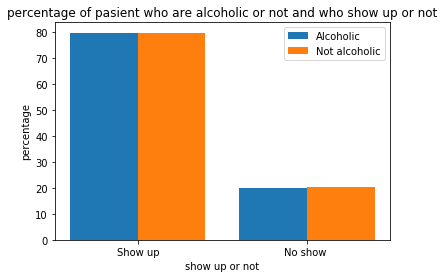

In [41]:
X = ['Show up','No show ']
alcol = [perc_alco_showup,perc_alco_noshow]
noalcol = [perc_noalco_showup,perc_noalco_noshow]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, alcol, 0.4, label = 'Alcoholic')
plt.bar(X_axis + 0.2, noalcol, 0.4, label = 'Not alcoholic')
  
plt.xticks(X_axis, X)
plt.xlabel("show up or not")
plt.ylabel("percentage")
plt.title("percentage of pasient who are alcoholic or not and who show up or not")
plt.legend()
plt.show()

Given that the percentage of alcoholics(79,85%) and non-alcoholics(79,80%) who respect their appointment is the same, we can conclude that alcoholism does not play a role in whether or not the appointment is respected.

### Research Question 6:Does the handicap play a role in not respecting the appointment?

To answer of this question we take the following steps: 

a) we get the list of Handcap pasient and not handcap pasient

In [42]:
Handcap=get_sublist(df_Ns,'Handcap==1')
NoHandcap=get_sublist(df_Ns,'Handcap==0')

b) we get the list of Hancap who show up and no, we do same  with NoHandcap list

In [43]:
Handcap_showup=get_sublist(Handcap,'No_show=="No"')
Handcap_noshow=get_sublist(Handcap,'No_show=="Yes"')
NoHandcap_showup=get_sublist(NoHandcap,'No_show=="No"')
NoHandcap_noshow=get_sublist(NoHandcap,'No_show=="Yes"')


d) now we get the percentage of each categorie

In [44]:
Perc_Handcap_showup=len(Handcap_showup)/len(Handcap)*100
Perc_Handcap_noshow=len(Handcap_noshow)/len(Handcap)*100
Perc_NoHandcap_showup=len(NoHandcap_showup)/len(NoHandcap)*100
Perc_NoHandcap_noshow=len(NoHandcap_noshow)/len(NoHandcap)*100
Perc_Handcap_showup,Perc_Handcap_noshow,Perc_NoHandcap_showup,Perc_NoHandcap_noshow


(81.91156766413577, 18.088432335864223, 79.76672023050922, 20.233279769490775)

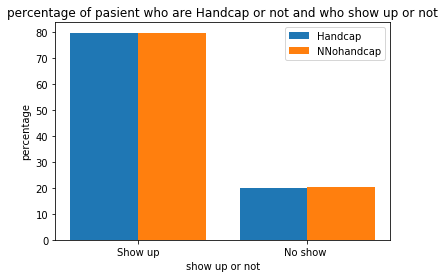

In [45]:
X = ['Show up','No show ']
Handcap = [Perc_Handcap_showup,Perc_Handcap_noshow]
noalcol = [Perc_NoHandcap_showup,Perc_NoHandcap_noshow]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, alcol, 0.4, label = 'Handcap')
plt.bar(X_axis + 0.2, noalcol, 0.4, label = 'NNohandcap')
  
plt.xticks(X_axis, X)
plt.xlabel("show up or not")
plt.ylabel("percentage")
plt.title("percentage of pasient who are Handcap or not and who show up or not")
plt.legend()
plt.show()

we note that the handicap has a weak effect on the respect of the appointment(81,91% of Handcap respect the appointment versus 79.76% of no Handcap persons with respect his appointment ) however the difference is minimal(2.15%)so that we can conclude that the handicap plays a insignificant role on the respect of the appointment

<a id='conclusions'></a>
## Conclusions
At the end of our analysis we can draw the following conclusions on our data set:
<ul>
<li>Gender is not an indicator of whether a pasient will keep their appointment or not.</li>
 <li>   the elders are the ones who respect the appointment more while the teenagers are the ones who respect it less.</li>
    <li> less is the waiting time for the appointements more pasients show up</li>
     <li>there is no correlation between the reminder sms and going to the appointment</li>
     <li>alcoholism does not play a role in whether or not the appointment is respected.</li>
     <li>handicap plays a insignificant role on the respect or not of the appointment</li>
</ul>




## Limitation
the informations on the distance between the hospital and the patient's home, as well as the cost of travel would also have allowed us to further our analysis on the non-respect of the appointment


## Submitting your Project 

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0